In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
from keras import utils
( train_X , train_Y ) , ( test_X , test_Y ) = mnist . load_data ()

In [4]:
type(train_X)

numpy.ndarray

In [5]:
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

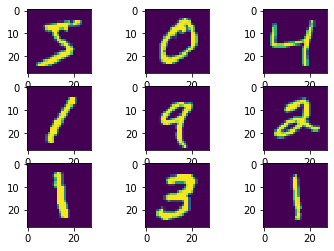

In [6]:
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(train_X[0])
axarr[0,1].imshow(train_X[1])
axarr[0,2].imshow(train_X[2])
axarr[1,0].imshow(train_X[3])
axarr[1,1].imshow(train_X[4])
axarr[1,2].imshow(train_X[5])
axarr[2,0].imshow(train_X[6])
axarr[2,1].imshow(train_X[7])
axarr[2,2].imshow(train_X[8])

In [7]:
def preprocessing(X_train, Y_train, X_test, Y_test):
    
    #Scale pixels to float values between 0 and 1
    X_train = X_train.astype("float32") / 255
    X_test = X_test.astype("float32") / 255
    
    #Reshape train matrixes to have a 28 x 28 x 1 matrix where the 28s represent the pixels along the X and Y dimensions
    #and the 1 represents ??? ... Why are we doing this? -- what does the -1 even do here??
    X_train = np.expand_dims(X_train, -1)
    X_test = np.expand_dims(X_test, -1)
    
    #convert output variable to a one-hot vector
    Y_train = utils.np_utils.to_categorical(Y_train, 10, dtype="float32")
    Y_test = utils.np_utils.to_categorical(Y_test, 10, dtype="float32")
    
    return X_train, Y_train, X_test, Y_test

In [8]:
train_X, train_Y, test_X, test_Y = preprocessing(train_X, train_Y, test_X, test_Y)

In [9]:
train_X[1][0][0]

array([0.], dtype=float32)

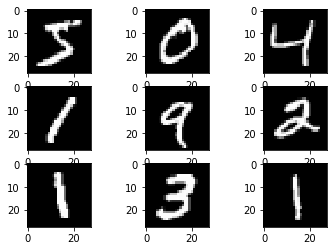

In [10]:
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(train_X[0].squeeze(axis=2), cmap="gray")
axarr[0,1].imshow(train_X[1].squeeze(axis=2), cmap="gray")
axarr[0,2].imshow(train_X[2].squeeze(axis=2), cmap="gray")
axarr[1,0].imshow(train_X[3].squeeze(axis=2), cmap="gray")
axarr[1,1].imshow(train_X[4].squeeze(axis=2), cmap="gray")
axarr[1,2].imshow(train_X[5].squeeze(axis=2), cmap="gray")
axarr[2,0].imshow(train_X[6].squeeze(axis=2), cmap="gray")
axarr[2,1].imshow(train_X[7].squeeze(axis=2), cmap="gray")
axarr[2,2].imshow(train_X[8].squeeze(axis=2), cmap="gray")

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

def create_cnn():
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32 , (3,3) , activation = 'relu' , kernel_initializer = 'he_uniform' , input_shape = (28 , 28 , 1 )))

    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))

    # Flatten output
    model.add(Flatten())

    # Dense layer of 100 neurons
    model.add(Dense(100 , activation = 'relu' , kernel_initializer = 'he_uniform'))
    model.add(Dense(10 , activation= 'softmax'))

    # initialize optimizer
    opt = SGD(lr =0.01 , momentum=0.9)

    # compile model
    model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [12]:
model = create_cnn()
model.layers

C:\Users\bls24\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
#Fit model on training data
model.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
#Call evaluate method to calcualte a model score
score = model.evaluate(test_X, test_Y, verbose=0)
#Report the model accuracy
print(score)

Epoch 1/10
1688/1688 [==============================] - 28s 16ms/step - loss: 0.1688 - accuracy: 0.9481 - val_loss: 0.0805 - val_accuracy: 0.9793
Epoch 2/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0580 - accuracy: 0.9822 - val_loss: 0.0523 - val_accuracy: 0.9862
Epoch 3/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0389 - accuracy: 0.9882 - val_loss: 0.0462 - val_accuracy: 0.9880
Epoch 4/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0262 - accuracy: 0.9919 - val_loss: 0.0468 - val_accuracy: 0.9878
Epoch 5/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0178 - accuracy: 0.9950 - val_loss: 0.0451 - val_accuracy: 0.9882
Epoch 6/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0121 - accuracy: 0.9964 - val_loss: 0.0523 - val_accuracy: 0.9867
Epoch 7/10
1688/1688 [==============================] - 30s 17ms/step - loss: 0.0086 - accuracy: 0.9977 - val_loss: 0.0504 -

In [14]:
model.metrics_names

['loss', 'accuracy']

In [15]:
print("Accuracy: ", score[1])

Accuracy:  0.9883000254631042


In [16]:
#Fit model on training data with 50 epochs and store fit with variable history
model1b = create_cnn()
history = model1b.fit(train_X, train_Y, batch_size=32, epochs=50, validation_split=0.1)

Epoch 1/50
1688/1688 [==============================] - 26s 15ms/step - loss: 0.1700 - accuracy: 0.9476 - val_loss: 0.0638 - val_accuracy: 0.9833
Epoch 2/50
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0595 - accuracy: 0.9816 - val_loss: 0.0545 - val_accuracy: 0.9857
Epoch 3/50
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0377 - accuracy: 0.9885 - val_loss: 0.0487 - val_accuracy: 0.9867
Epoch 4/50
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0269 - accuracy: 0.9919 - val_loss: 0.0493 - val_accuracy: 0.9875
Epoch 5/50
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0178 - accuracy: 0.9946 - val_loss: 0.0467 - val_accuracy: 0.9878
Epoch 6/50
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0122 - accuracy: 0.9966 - val_loss: 0.0444 - val_accuracy: 0.9885
Epoch 7/50
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0080 - accuracy: 0.9979 - val_loss: 0.0496 -

In [23]:
history.history['accuracy'][0]

0.9476481676101685

In [26]:
tens_accuracy = []
tens_valaccuracy = []

for i in range(51):
    if i == 0:
        tens_accuracy.append(history.history['accuracy'][i])
        tens_valaccuracy.append(history.history['val_accuracy'][i])
    elif i % 10 == 0:# or i == 1:
        tens_accuracy.append(history.history['accuracy'][i-1])
        tens_valaccuracy.append(history.history['val_accuracy'][i-1])

Text(0.5, 1.0, 'Training Accuracy per 10 Epochs')

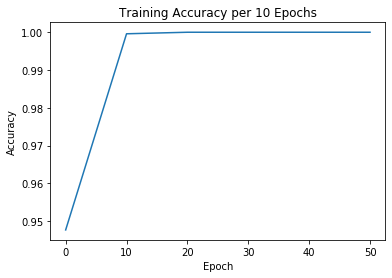

In [27]:
plt.plot([0,10,20,30,40,50], tens_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy per 10 Epochs")

Text(0.5, 1.0, 'Validation Accuracy per 10 Epochs')

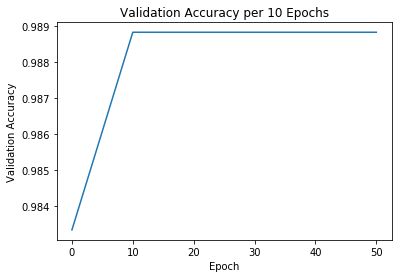

In [28]:
plt.plot([0,10,20,30,40,50], tens_valaccuracy)
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy per 10 Epochs")

Generally speaking, there is steady improvement for both the training and validation accuracy, up to around epoch 10, where both measures of accuracy flatten out. The training accuracy flattens out around 1 or 100% accuracy, while the validation accuracy steadys out around 0.989 or 98.9% accuracy. These two metrics suggest that overfitting is occuring.

In [30]:
from keras.layers import Dropout

def create_cnn2():
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32 , (3,3) , activation = 'relu' , kernel_initializer = 'he_uniform' , input_shape = (28 , 28 , 1 )))

    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))

    # Flatten output
    model.add(Flatten())

    # Drop-out feature to avoid over-fitting
    model.add(Dropout(0.5))
    
    # Dense layer of 100 neurons
    model.add(Dense(100 , activation = 'relu' , kernel_initializer = 'he_uniform'))
    model.add(Dense(10 , activation= 'softmax'))

    # initialize optimizer
    opt = SGD(lr =0.01 , momentum=0.9)

    # compile model
    model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [31]:
model2 = create_cnn2()
model2.layers

In [32]:
history2 = model2.fit(train_X, train_Y, batch_size=32, epochs=50, validation_split=0.1)

Epoch 1/50
1688/1688 [==============================] - 29s 17ms/step - loss: 0.2325 - accuracy: 0.9286 - val_loss: 0.0703 - val_accuracy: 0.9808
Epoch 2/50
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0974 - accuracy: 0.9695 - val_loss: 0.0524 - val_accuracy: 0.9865
Epoch 3/50
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0695 - accuracy: 0.9781 - val_loss: 0.0424 - val_accuracy: 0.9892
Epoch 4/50
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0554 - accuracy: 0.9828 - val_loss: 0.0436 - val_accuracy: 0.9883
Epoch 5/50
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0471 - accuracy: 0.9851 - val_loss: 0.0429 - val_accuracy: 0.9893
Epoch 6/50
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0398 - accuracy: 0.9874 - val_loss: 0.0412 - val_accuracy: 0.9893
Epoch 7/50
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0320 - accuracy: 0.9895 - val_loss: 0.0390 -

In [33]:
tens_accuracy2 = []
tens_valaccuracy2 = []

for i in range(51):
    if i == 0:
        tens_accuracy2.append(history2.history['accuracy'][i])
        tens_valaccuracy2.append(history2.history['val_accuracy'][i])
    elif i % 10 == 0:# or i == 1:
        tens_accuracy2.append(history2.history['accuracy'][i-1])
        tens_valaccuracy2.append(history2.history['val_accuracy'][i-1])

Text(0.5, 1.0, 'Training Accuracy per 10 Epochs')

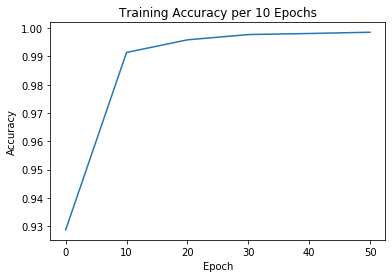

In [35]:
plt.plot([0,10,20,30,40,50], tens_accuracy2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy per 10 Epochs")

Text(0.5, 1.0, 'Validation Accuracy per 10 Epochs')

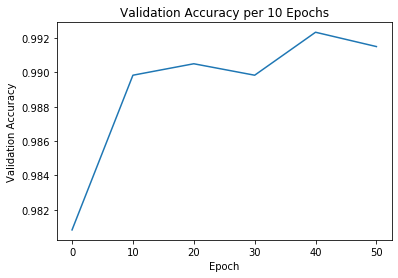

In [37]:
plt.plot([0,10,20,30,40,50], tens_valaccuracy2)
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy per 10 Epochs")

In [235]:
def create_cnn3(rate):
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32 , (3,3) , activation = 'relu' , kernel_initializer = 'he_uniform' , input_shape = (28 , 28 , 1 )))

    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    
    # Additional Convolution layer
    model.add(Conv2D(64, (3,3) , activation = 'relu' , kernel_initializer = 'he_uniform' , input_shape = (28 , 28 , 1 )))
    
    # Flatten output
    model.add(Flatten())

    # Drop-out feature to avoid over-fitting
    model.add(Dropout(0.5))
    
    # Dense layer of 100 neurons
    model.add(Dense(100 , activation = 'relu' , kernel_initializer = 'he_uniform'))
    model.add(Dense(10 , activation= 'softmax'))

    # initialize optimizer
    opt = SGD(lr = rate , momentum=0.9)

    # compile model
    model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [236]:
model3 = create_cnn3(.01)
model3.layers

In [237]:
model3.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
score3 = model3.evaluate(test_X, test_Y, verbose=0)
print("Accuracy: ", score3[1])

Epoch 1/10
1688/1688 [==============================] - 32s 18ms/step - loss: 0.1601 - accuracy: 0.9497 - val_loss: 0.0568 - val_accuracy: 0.9848
Epoch 2/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.0615 - accuracy: 0.9806 - val_loss: 0.0446 - val_accuracy: 0.9900
Epoch 3/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.0373 - val_accuracy: 0.9888
Epoch 4/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0397 - val_accuracy: 0.9893
Epoch 5/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0271 - accuracy: 0.9908 - val_loss: 0.0374 - val_accuracy: 0.9903curacy
Epoch 6/10
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0237 - accuracy: 0.9921 - val_loss: 0.0303 - val_accuracy: 0.9920
Epoch 7/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.

In [238]:
model4 = create_cnn3(.1)
model4.layers

In [239]:
model4.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
score4 = model4.evaluate(test_X, test_Y, verbose=0)
print("Accuracy: ", score4[1])

Epoch 1/10
1688/1688 [==============================] - 31s 18ms/step - loss: 0.8723 - accuracy: 0.7627 - val_loss: 0.7316 - val_accuracy: 0.7852
Epoch 2/10
1688/1688 [==============================] - 28s 17ms/step - loss: 2.1077 - accuracy: 0.2065 - val_loss: 2.3090 - val_accuracy: 0.1045
Epoch 3/10
1688/1688 [==============================] - 33s 20ms/step - loss: 2.3083 - accuracy: 0.1026 - val_loss: 2.3110 - val_accuracy: 0.0960
Epoch 4/10
1688/1688 [==============================] - 35s 21ms/step - loss: 2.3086 - accuracy: 0.1033 - val_loss: 2.3106 - val_accuracy: 0.1045
Epoch 5/10
1688/1688 [==============================] - 34s 20ms/step - loss: 2.3087 - accuracy: 0.1014 - val_loss: 2.3102 - val_accuracy: 0.1113
Epoch 6/10
1688/1688 [==============================] - 33s 20ms/step - loss: 2.3083 - accuracy: 0.1041 - val_loss: 2.3142 - val_accuracy: 0.0960
Epoch 7/10
1688/1688 [==============================] - 35s 21ms/step - loss: 2.3085 - accuracy: 0.1033 - val_loss: 2.3118 -

In [240]:
model5 = create_cnn3(.001)
model5.layers

In [241]:
model5.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
score5 = model5.evaluate(test_X, test_Y, verbose=0)
print("Accuracy: ", score5[1])

Epoch 1/10
1688/1688 [==============================] - 36s 21ms/step - loss: 0.2822 - accuracy: 0.9122 - val_loss: 0.0843 - val_accuracy: 0.9780
Epoch 2/10
1688/1688 [==============================] - 36s 21ms/step - loss: 0.1175 - accuracy: 0.9641 - val_loss: 0.0682 - val_accuracy: 0.9817
Epoch 3/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0856 - accuracy: 0.9734 - val_loss: 0.0541 - val_accuracy: 0.9860
Epoch 4/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0704 - accuracy: 0.9789 - val_loss: 0.0494 - val_accuracy: 0.9875
Epoch 5/10
1688/1688 [==============================] - 35s 21ms/step - loss: 0.0614 - accuracy: 0.9809 - val_loss: 0.0511 - val_accuracy: 0.9853
Epoch 6/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0540 - accuracy: 0.9828 - val_loss: 0.0495 - val_accuracy: 0.9875
Epoch 7/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0492 - accuracy: 0.9845 - val_loss: 0.0421 -

**Problem 2**

In [38]:
from PIL import Image
img=plt.imread("mona.jpg")

In [40]:
len(img)

900

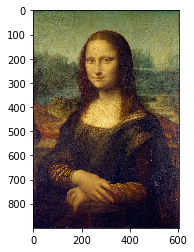

In [42]:
plt.imshow(img)

In [46]:
img.shape

(900, 604, 3)

In [50]:
image_format = np.zeros((len(img), len(img[0]), 3))
image_coordinates = []
for y in range(len(img)):
    for x in range(len(img[0])):
        image_coordinates.append((x,y)) #image_coordinates is an array of (x,y) tuples that holds all the coordinates where a pixel
                                        #exists based on the dimensions of the mona lisa img file above.

In [51]:
def sample(img, samples): #this function draws "samples" number of random coordinate pairs from the "img" dimensions
    samps = []
    for i in range(samples):
        y = np.random.random_integers(0, len(img)-1)
        x = np.random.random_integers(0, len(img[0])-1)
        samps.append((x,y))
    return(samps) #returned by this function is an array of (x,y) tuples that holds the randomly drawn coordinate samples to be
                    #to be used in the training of our random forest model

In [52]:
training_coordinates = sample(img, 5000)

C:\Users\bls24\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 899 + 1) instead
  after removing the cwd from sys.path.
C:\Users\bls24\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 603 + 1) instead
  """


In [26]:
#We chose 


#What other preprocessing steps are neccessary for random forests inputs?
#Mean subtraction? Standardization? Unit-Normalization?
#Take necessary additional measures and justify them
#What other pre-processing? idk -- max

In [27]:
def output(img, training_coordinates): #this function maps the (x,y) coordinates from our training samples with the rgb values
    rgb_outputs = []                   #that correspond to such values drawn from the img file
    for coord_pair in training_coordinates:
        rgb_outputs.append(img[coord_pair[1]][coord_pair[0]])
    return(rgb_outputs)

In [28]:
rgb_outputs = output(img, training_coordinates)

In [29]:
#What other preprocessing steps are necessary for random regression forest outputs?
#Describe them, implement them, and justify your decisions

In [30]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(training_coordinates, rgb_outputs)
predictions = regr.predict(image_coordinates)

C:\Users\bls24\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [49]:
pred_img = np.reshape(predictions, (900, 604, 3)).astype(dtype=int)

In [50]:
pred_img[0][0]

array([ 79, 108,  81])

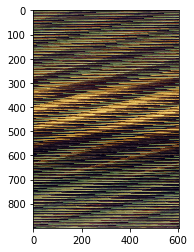

In [51]:
plt.imshow(pred_img)

In [455]:
prediction_image = np.zeros((len(img[0]), len(img), 3))
counter = 0
for x in range(len(img[0])):
    for y in range(len(img)):
        prediction_image[x][y] = predictions[counter]
        counter+=1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


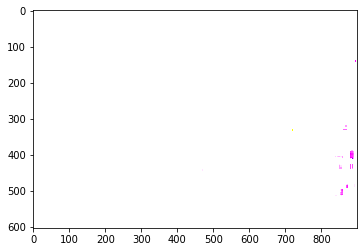

In [456]:
plt.imshow(prediction_image)